<a href="https://colab.research.google.com/github/Vishnu-919/Covid-19-Vaccination-Data/blob/main/Vaccination_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    **DAV COURSE END PROJECT**


*  Roll no: 160123737034
*  Name   : B VISHNU VARDAN
* Section: IT-1

In [ ]:
from zipfile import ZipFile

# Upload ZIP file manually through sidebar
with ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("vaccination_data")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for plots
sns.set(style="whitegrid")


In [ ]:
# Load CSV files (adjust the path if inside a folder)
vacc_df = pd.read_csv("vaccination_data/country_vaccinations.csv")
manuf_df = pd.read_csv("vaccination_data/country_vaccinations_by_manufacturer.csv")

# Convert date columns to datetime
vacc_df['date'] = pd.to_datetime(vacc_df['date'])
manuf_df['date'] = pd.to_datetime(manuf_df['date'])


In [ ]:
vacc_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


<ipython-input-151-fc99caa6adf8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values,y=top_10.index,palette='viridis')


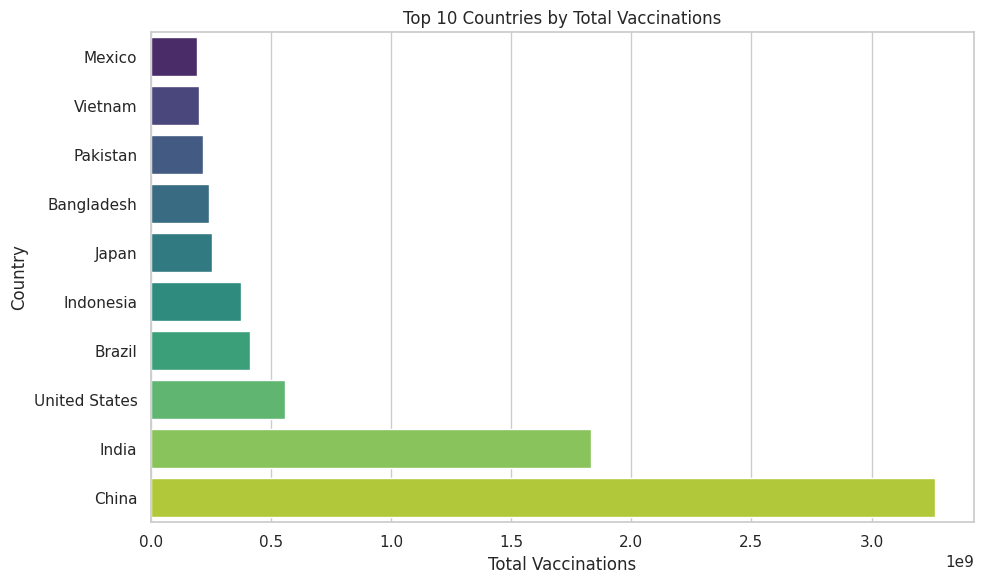

In [151]:
top_10=vacc_df.groupby("country")["total_vaccinations"].max().nlargest(10).sort_values()
plt.figure(figsize=(10,6))
sns.barplot(x=top_10.values,y=top_10.index,palette='viridis')
plt.title("Top 10 Countries by Total Vaccinations")
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")
plt.tight_layout()
plt.grid(True,axis='x')
plt.show()

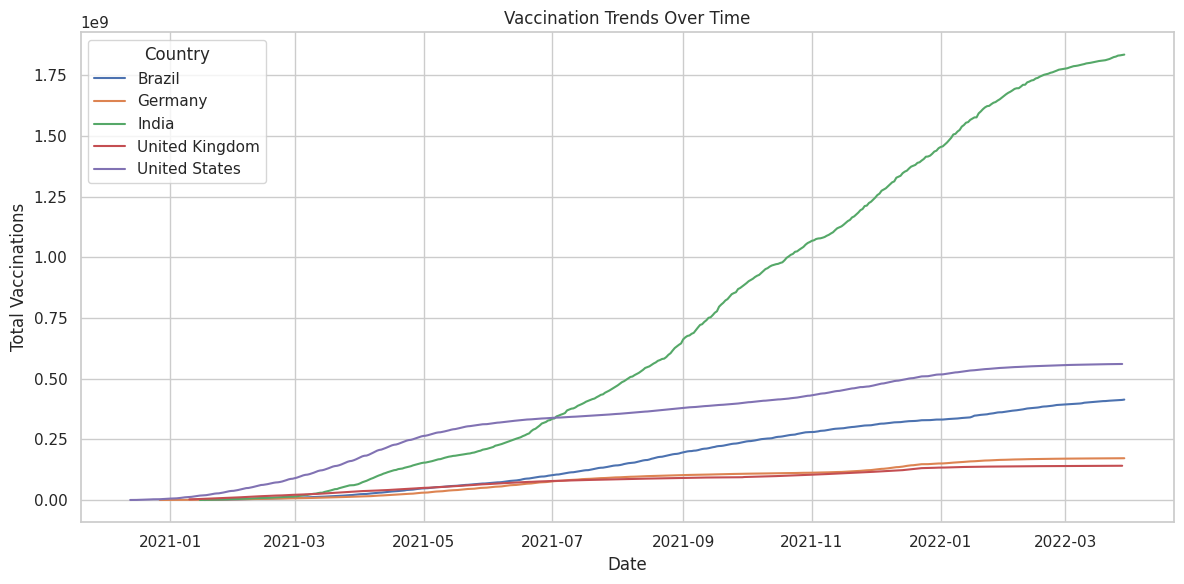

In [ ]:
countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']
trend_df = vacc_df[vacc_df['country'].isin(countries)]

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='date', y='total_vaccinations', hue='country')
plt.title("Vaccination Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


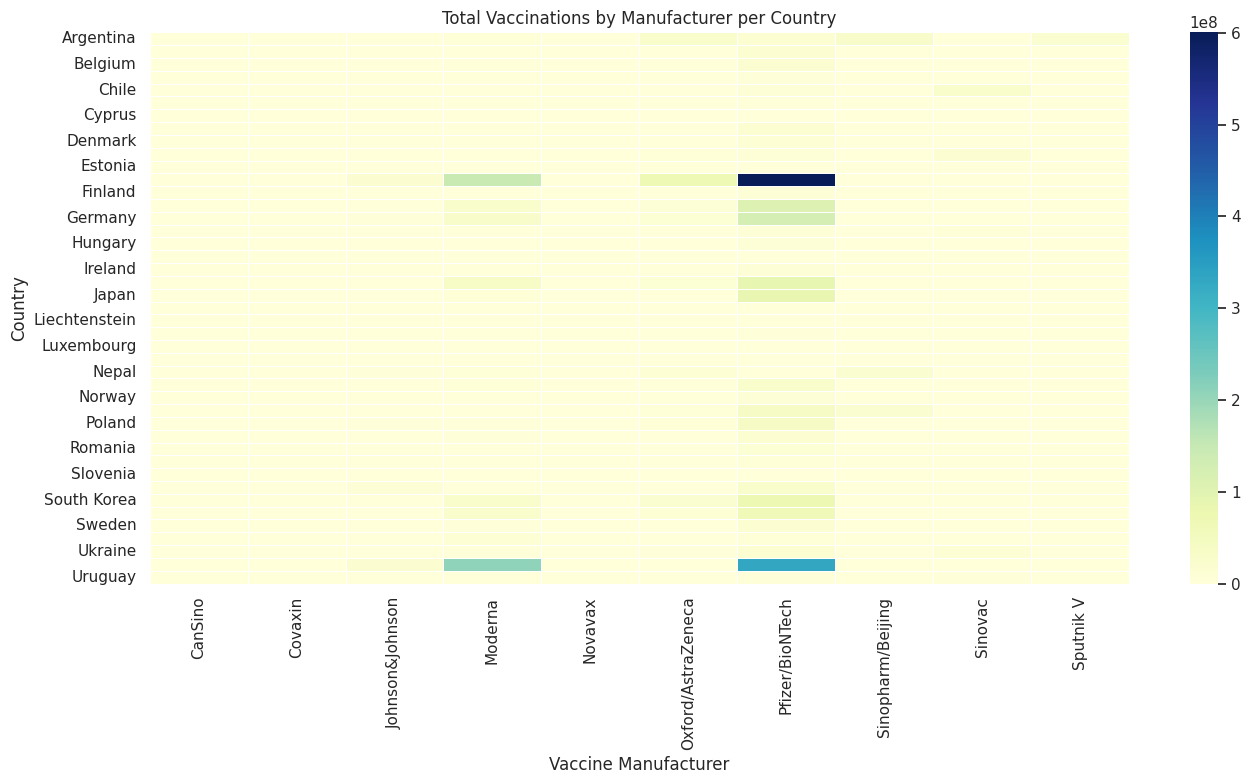

In [ ]:
# Group and pivot manufacturer data
heat_df = manuf_df.groupby(['location', 'vaccine'])['total_vaccinations'].max().unstack().fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(heat_df, cmap="YlGnBu", linewidths=0.5)
plt.title("Total Vaccinations by Manufacturer per Country")
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [ ]:
vacc_df.loc[35377:35380,['country','date','total_vaccinations']]

,country,date,total_vaccinations
35377,India,2021-01-20,806484.0
35378,India,2021-01-21,1043534.0
35379,India,2021-01-22,1390592.0
35380,India,2021-01-23,1582201.0


In [ ]:
vacc_df.iloc[5:,[0,2,3]]

,country,date,total_vaccinations
5,Afghanistan,2021-02-27,NaN
6,Afghanistan,2021-02-28,8200.0
7,Afghanistan,2021-03-01,NaN
8,Afghanistan,2021-03-02,NaN
9,Afghanistan,2021-03-03,NaN
...,...,...,...
86507,Zimbabwe,2022-03-25,8691642.0
86508,Zimbabwe,2022-03-26,8791728.0
86509,Zimbabwe,2022-03-27,8845039.0
86510,Zimbabwe,2022-03-28,8934360.0


In [ ]:
vacc_df.describe()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,86512,4.360700e+04,4.129400e+04,3.880200e+04,3.536200e+04,8.621300e+04,43607.000000,41294.000000,38802.000000,86213.000000
mean,2021-09-01 17:09:45.907157504,4.592964e+07,1.770508e+07,1.413830e+07,2.705996e+05,1.313055e+05,80.188543,40.927317,35.523243,3257.049157
min,2020-12-02 00:00:00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2021-05-27 00:00:00,5.264100e+05,3.494642e+05,2.439622e+05,4.668000e+03,9.000000e+02,16.050000,11.370000,7.020000,636.000000
50%,2021-09-04 00:00:00,3.590096e+06,2.187310e+06,1.722140e+06,2.530900e+04,7.343000e+03,67.520000,41.435000,31.750000,2050.000000
75%,2021-12-12 00:00:00,1.701230e+07,9.152520e+06,7.559870e+06,1.234925e+05,4.409800e+04,132.735000,67.910000,62.080000,4682.000000
max,2022-03-29 00:00:00,3.263129e+09,1.275541e+09,1.240777e+09,2.474100e+07,2.242429e+07,345.370000,124.760000,122.370000,117497.000000
std,NaN,2.246004e+08,7.078731e+07,5.713920e+07,1.212427e+06,7.682388e+05,67.913577,29.290759,28.376252,3934.312440


In [ ]:
vacc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

In [ ]:
vacc_df.index


RangeIndex(start=0, stop=86512, step=1)

In [ ]:
vacc_df.duplicated().sum()

np.int64(0)

In [ ]:
vacc_df.dtypes

,0
country,object
iso_code,object
date,datetime64[ns]
total_vaccinations,float64
people_vaccinated,float64
people_fully_vaccinated,float64
daily_vaccinations_raw,float64
daily_vaccinations,float64
total_vaccinations_per_hundred,float64
people_vaccinated_per_hundred,float64


In [ ]:
manuf_df.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [ ]:
manuf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35623 entries, 0 to 35622
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            35623 non-null  object        
 1   date                35623 non-null  datetime64[ns]
 2   vaccine             35623 non-null  object        
 3   total_vaccinations  35623 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
manuf_df.index

RangeIndex(start=0, stop=35623, step=1)

In [ ]:
manuf_df.duplicated().sum()

np.int64(0)

In [ ]:
manuf_df.dtypes

,0
location,object
date,datetime64[ns]
vaccine,object
total_vaccinations,int64


In [ ]:
# General overview
vacc_df.info()
vacc_df.describe()
vacc_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86512 non-null  object        
 1   iso_code                             86512 non-null  object        
 2   date                                 86512 non-null  datetime64[ns]
 3   total_vaccinations                   43607 non-null  float64       
 4   people_vaccinated                    41294 non-null  float64       
 5   people_fully_vaccinated              38802 non-null  float64       
 6   daily_vaccinations_raw               35362 non-null  float64       
 7   daily_vaccinations                   86213 non-null  float64       
 8   total_vaccinations_per_hundred       43607 non-null  float64       
 9   people_vaccinated_per_hundred        41294 non-null  float64       
 10  people_ful

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


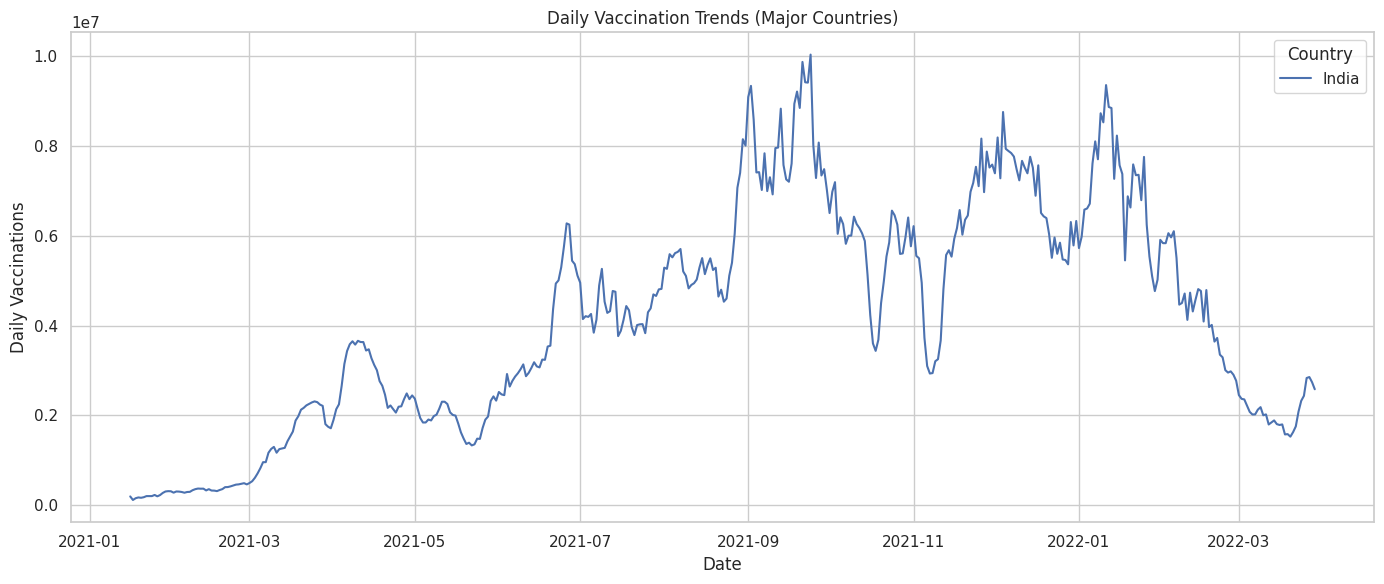

In [ ]:
major_countries = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']
# Change 'Country' to 'country' to match the actual column name in vacc_df
filtered_df = vacc_df[vacc_df['country'].isin(major_countries)]

plt.figure(figsize=(14, 6))
# Change 'Country' to 'country' for the hue parameter as well
sns.lineplot(data=filtered_df, x='date', y='daily_vaccinations', hue='country')
plt.title("Daily Vaccination Trends (Major Countries)")
plt.ylabel("Daily Vaccinations")
plt.xlabel("Date")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

Fully Vaccinated People per 100 Population (Top 10)


<ipython-input-133-24ab850066bc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fully_vax.values, y=top_fully_vax.index, palette="coolwarm")


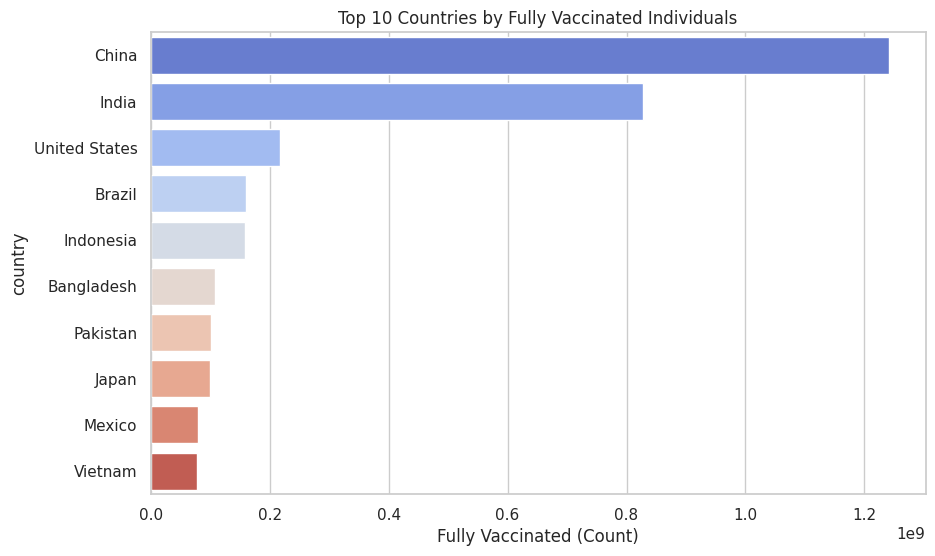

In [ ]:
top_fully_vax = vacc_df.groupby("country")['people_fully_vaccinated'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_fully_vax.values, y=top_fully_vax.index, palette="coolwarm")
plt.title("Top 10 Countries by Fully Vaccinated Individuals")
plt.xlabel("Fully Vaccinated (Count)")
plt.ylabel("country")
plt.show()

## Vaccine Usage by Manufacturer (Manufacturer Dataset)

<ipython-input-135-6753e66ca22f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_by_manufacturer.values, y=total_by_manufacturer.index, palette="Set2")


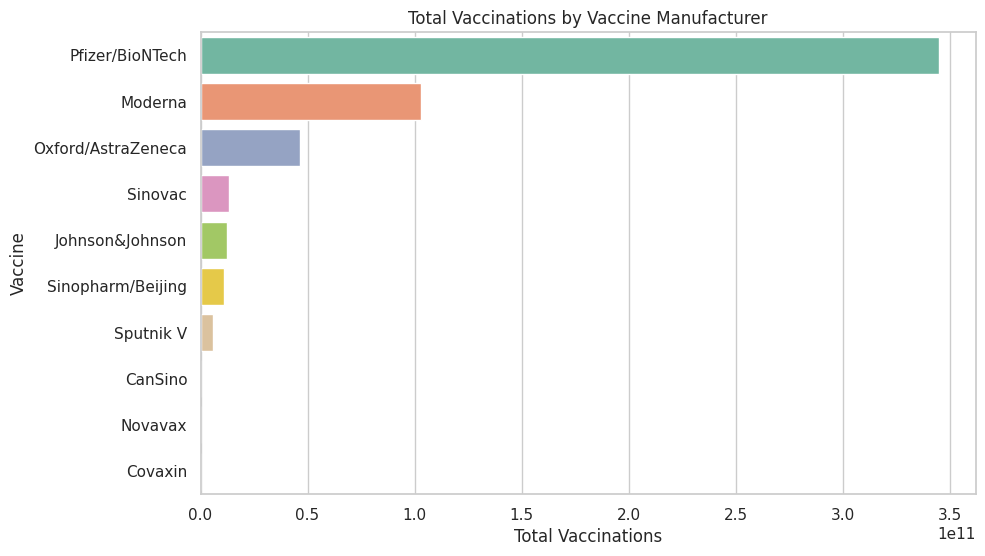

In [ ]:
manuf_df['date'] = pd.to_datetime(manuf_df['date'])
total_by_manufacturer = manuf_df.groupby('vaccine')['total_vaccinations'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_by_manufacturer.values, y=total_by_manufacturer.index, palette="Set2")
plt.title("Total Vaccinations by Vaccine Manufacturer")
plt.xlabel("Total Vaccinations")
plt.ylabel("Vaccine")
plt.show()


Heatmap: Daily Vaccinations per Million (Countries with Most Data)

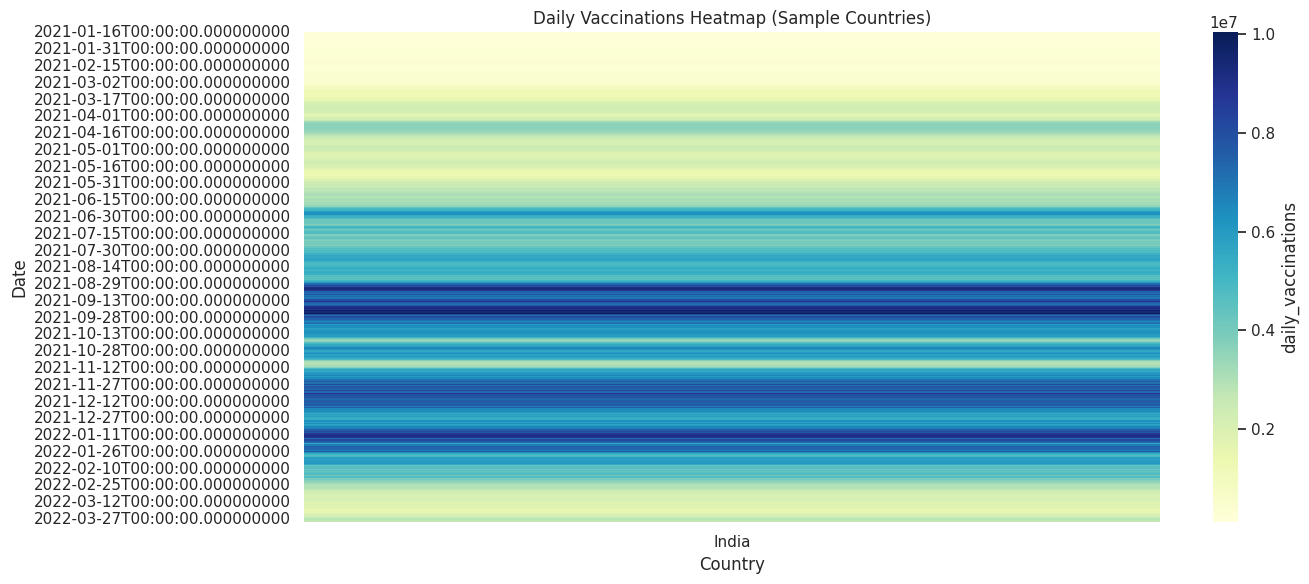

In [ ]:
# Pivot table for heatmap
# Change 'daily_vax' to 'daily_vaccinations'
# Change 'Date' to 'date' and 'Country' to 'country' to match column names
heat_df = vacc_df.pivot_table(index='date', columns='country', values='daily_vaccinations', aggfunc='mean')
selected_cols = heat_df.columns[0:8]  # Show for 8 countries for readability

plt.figure(figsize=(14, 6))
sns.heatmap(heat_df[selected_cols].fillna(0), cmap="YlGnBu", cbar_kws={'label': 'daily_vaccinations'}) # Update cbar label
plt.title("Daily Vaccinations Heatmap (Sample Countries)")
plt.xlabel("Country")
plt.ylabel("Date")
plt.tight_layout()
plt.show()

In [ ]:
vacc_df["country"].value_counts()

,count
country,
Norway,482
Latvia,480
Denmark,476
United States,471
Russia,470
...,...
Bonaire Sint Eustatius and Saba,146
Tokelau,114
Saint Helena,92


In [ ]:
vacc_df.groupby("daily_vaccinations")["country"].nunique()

,country
daily_vaccinations,
0.0,27
1.0,15
2.0,14
3.0,15
4.0,18
...,...
21993000.0,1
21998714.0,1
22105857.0,1


# Value Counts

In [ ]:
vacc_df["country"].value_counts(normalize=True)*100

,proportion
country,
Norway,0.557148
Latvia,0.554836
Denmark,0.550213
United States,0.544433
Russia,0.543277
...,...
Bonaire Sint Eustatius and Saba,0.168763
Tokelau,0.131774
Saint Helena,0.106344


In [ ]:
vacc_df.iloc[-5:,[0,3]]

,country,total_vaccinations
86507,Zimbabwe,8691642.0
86508,Zimbabwe,8791728.0
86509,Zimbabwe,8845039.0
86510,Zimbabwe,8934360.0
86511,Zimbabwe,9039729.0
